In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14
import pgeocode
plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import scipy.stats as stats
from pandas.api.types import CategoricalDtype


from pygeocoder import Geocoder
from pandas.api.types import CategoricalDtype

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from googletrans import Translator

from sklearn.preprocessing import StandardScaler

In [2]:
austin = pd.read_pickle('../pickled_data/austin_all.pickled')
sanfran = pd.read_pickle('../pickled_data/sf_all_df.pickled')
LA = pd.read_pickle('../pickled_data/LA_new_df.pickled')
chicago = pd.read_pickle('../pickled_data/chicago_trips_df.pickled')
# london = pd.read_pickle('../pickled_data/london_counts_df.pickled')
# DC = pd.read_pickle('../pickled_data/DC_df.pickled')

#  Subscription Types:

In [3]:
# sanfran.subscription_type.value_counts()
# sanfran => OK

In [4]:
subsctiption_la = []
for val in LA.passholder_type:
    if val in ['Monthly Pass','Annual Pass']:
        subsctiption_la.append('Subscriber')
    else:
        subsctiption_la.append('Customer')
        
LA['subscription_type']= subsctiption_la
del LA['passholder_type']
# LA => OK

In [5]:
chicago.rename(columns={'usertype': 'subscription_type'}, inplace=True)
# chicago => OK

In [6]:
Subscriber_austin = ['Local365','Local30','Annual Membership (Austin B-cycle)'\
                     ,'Local365 ($80 plus tax)','Founding Member','Founding Member (Austin B-cycle)'\
                     ,'7-Day Membership (Austin B-cycle)','Local365+Guest Pass','Semester Membership (Austin B-cycle)'\
                     ,'Semester Membership','Local30 ($11 plus tax)','Annual','Weekender ($15 plus tax)'\
                     ,'Annual (San Antonio B-cycle)','Annual Membership','Annual Member',\
                     'Annual Member (Houston B-cycle)','Annual Membership (Fort Worth Bike Sharing)'\
                     ,'Annual (Denver B-cycle)','Annual (Madison B-cycle)','Annual (Broward B-cycle)'\
                     ,'Annual Plus','Annual (Denver Bike Sharing)','Annual (Boulder B-cycle)'\
                     ,'Local365 Youth with helmet (age 13-17 riders)','Republic Rider (Annual)'\
                     ,'Annual Membership (GREENbike)','Annual (Kansas City B-cycle)','Annual (Cincy Red Bike)'\
                     ,'Annual (Nashville B-cycle)','Annual Membership (Charlotte B-cycle)','Annual Pass'\
                     ,'Membership: pay once  one-year commitment','Denver B-cycle Founder'\
                     ,'Annual Membership (Indy - Pacers Bikeshare )','Local365 Youth (age 13-17 riders)'\
                     ,'Annual (Omaha B-cycle)']

subsctiption_austin=[]
for val in austin.subscriber_type:
    if val in Subscriber_austin:
        subsctiption_austin.append('Subscriber')
    else:
        subsctiption_austin.append('Customer')
   
austin['subscription_type']= subsctiption_austin
del austin['subscriber_type']
# austin => OK

In [7]:
LA_sub = LA.groupby(['Day','subscription_type'])['subscription_type'].count()
SF_sub = sanfran.groupby(['Start_Day','subscription_type'])['subscription_type'].count()
Chicago_sub = chicago.groupby(['Day','subscription_type'])['subscription_type'].count()
austin_sub = austin.groupby(['Start_Day','subscription_type'])['subscription_type'].count()

In [8]:
# df_sub_LA = pd.DataFrame({'SF':SF_sub,'Austin':austin_sub,'LA':LA_sub,'Chicago':Chicago_sub})
# # df_sub_LA.plot.barh( figsize=(14,11));

# fig = plt.figure()
# df_sub_LA.plot.barh( colormap='summer', figsize=(14,11))
# # (kind='barh', color='purple', width=0.85)
# fig.suptitle('Subsciption Types', fontsize=20)
# plt.xlabel('Counts', fontsize=18)
# # plt.ylabel('Counts', fontsize=16)


In [9]:
LA_sub_1 = LA_sub/LA.groupby(['Day','subscription_type'])['subscription_type'].count().mean()
SF_sub_1 = SF_sub/sanfran.groupby(['Start_Day','subscription_type'])['subscription_type'].count().mean()
Chicago_sub_1 = Chicago_sub/chicago.groupby(['Day','subscription_type'])['subscription_type'].count().mean()
austin_sub_1 = austin_sub/austin.groupby(['Start_Day','subscription_type'])['subscription_type'].count().mean()

In [11]:
df_sub_LA_1 = pd.DataFrame({'SF':SF_sub_1,'Austin':austin_sub_1,'LA':LA_sub_1,'Chicago':Chicago_sub_1})


In [12]:
df_sub_LA_1['Subscription_Type'] = ['Customer','Subscriber','Customer',\
                                    'Subscriber','Customer','Subscriber',\
                                    'Customer','Subscriber','Customer','Subscriber',\
                                    'Customer','Subscriber','Customer','Subscriber']



In [13]:
df_sub_LA_1[df_sub_LA_1.Subscription_Type=='Customer']

,,SF,Austin,LA,Chicago,Subscription_Type
Start_Day,subscription_type,,,,,
Monday,Customer,0.239667,0.995373,0.674939,0.312679,Customer
Tuesday,Customer,0.230702,0.725024,0.669619,0.250623,Customer
Wednesday,Customer,0.240210,0.743693,0.642385,0.277775,Customer
Thursday,Customer,0.260188,0.890833,0.681743,0.276881,Customer
Friday,Customer,0.312305,1.450589,0.822897,0.321348,Customer
Saturday,Customer,0.462324,2.500106,1.129564,0.627211,Customer
Sunday,Customer,0.411377,1.976127,1.134978,0.564615,Customer


Text(0.5, 0, 'Counts')

<Figure size 432x288 with 0 Axes>

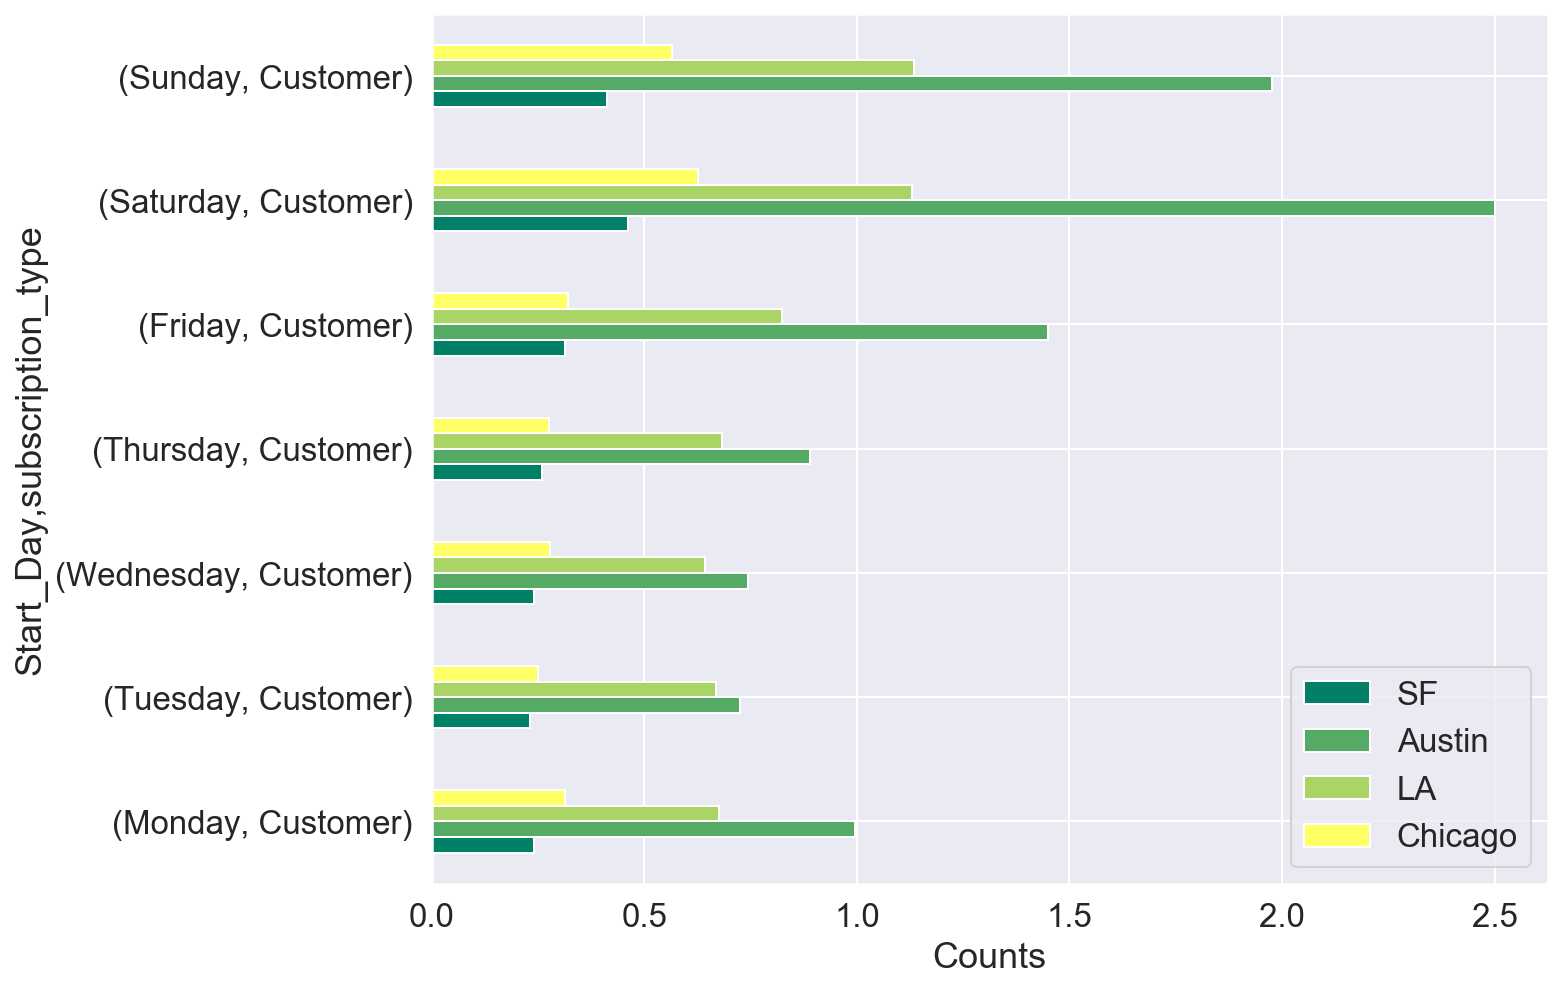

In [17]:
# df_sub_LA_1 = pd.DataFrame({'SF':SF_sub_1,'Austin':austin_sub_1,'LA':LA_sub_1,'Chicago':Chicago_sub_1})
# # df_sub_LA.plot.barh( figsize=(14,11));

fig = plt.figure()
df_sub_LA_1[df_sub_LA_1.Subscription_Type=='Customer'].plot.barh( colormap='summer', figsize=(10,8))
# (kind='barh', color='purple', width=0.85)
fig.suptitle('Subsciption Types', fontsize=20)
plt.xlabel('Counts', fontsize=18)
# plt.ylabel('Counts', fontsize=16)

Text(0.5, 0, 'Counts')

<Figure size 432x288 with 0 Axes>

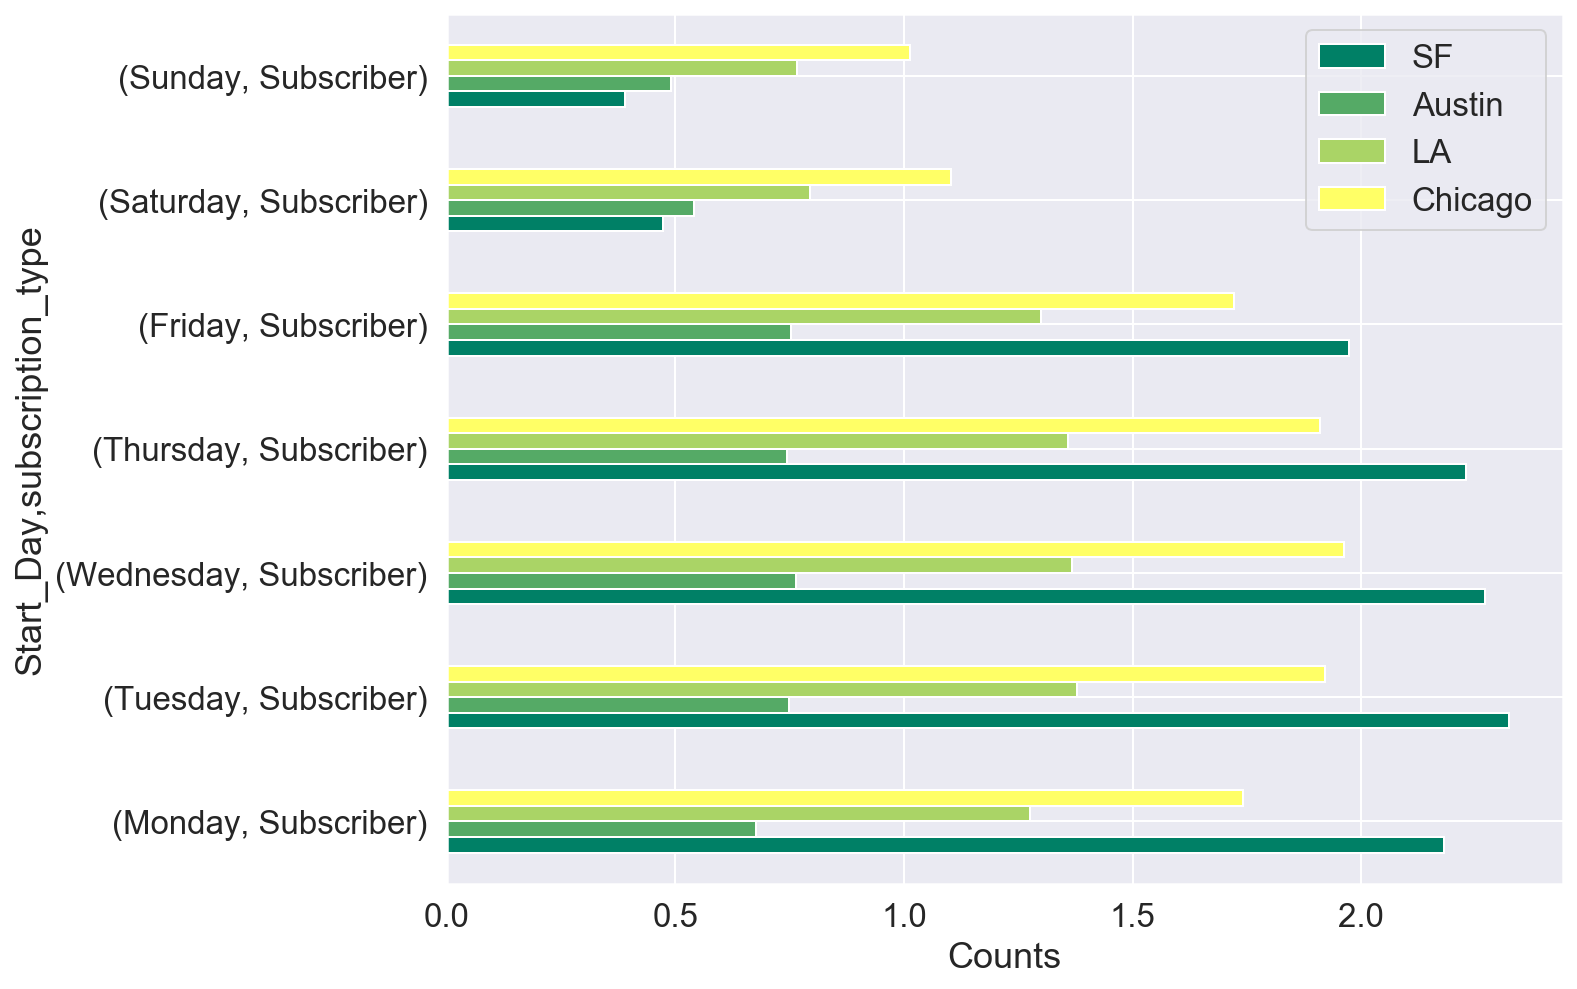

In [18]:
fig = plt.figure()
df_sub_LA_1[df_sub_LA_1.Subscription_Type=='Subscriber'].plot.barh( colormap='summer', figsize=(10,8))
# (kind='barh', color='purple', width=0.85)
fig.suptitle('Subsciption Types', fontsize=20)
plt.xlabel('Counts', fontsize=18)